#### **Importing Dependencies**

In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

### **Importing Dataset**

In [24]:
dataset = sklearn.datasets.fetch_california_housing()

In [25]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df["Price"] = dataset.target

In [26]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### **Checking the Shape and Missing Values**

In [27]:
df.shape

(20640, 9)

In [28]:
df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [29]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### **Understanding the Correlation between various features in dataset**  
1. Positive Correlation  
2. Negative Correlation

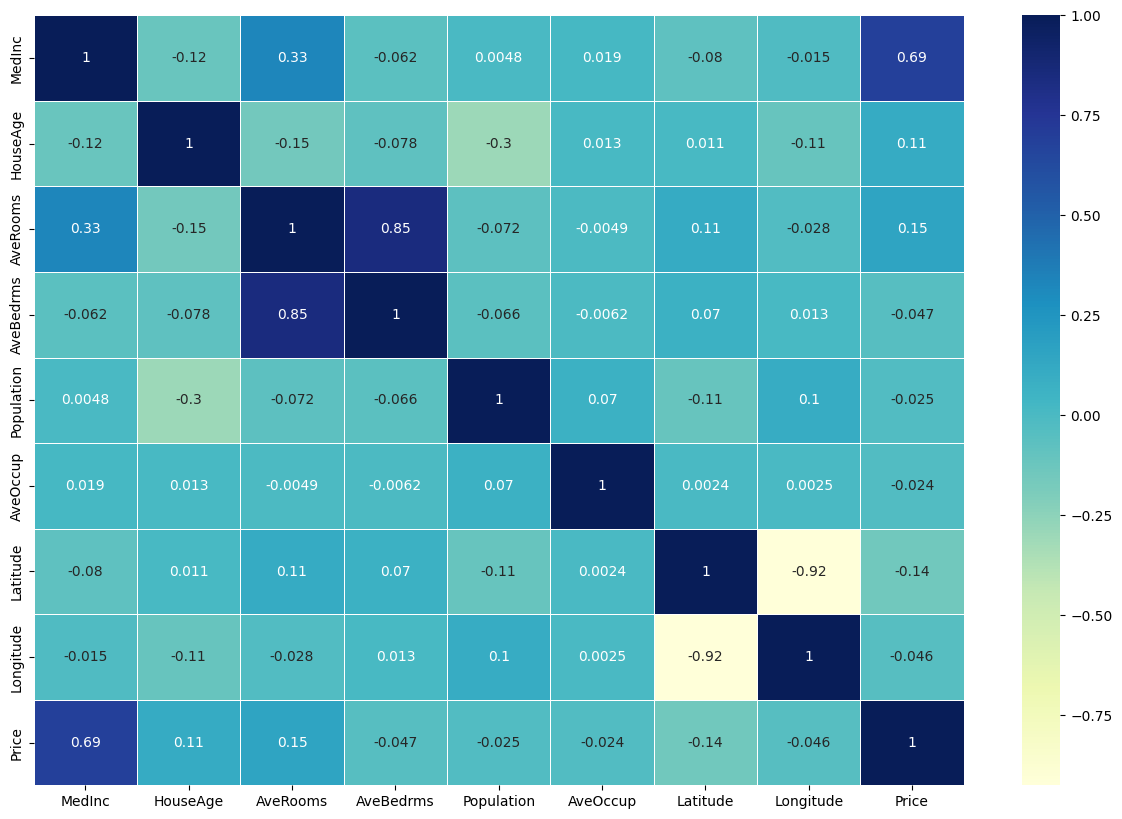

In [30]:
coor_matrix = df.corr()

fig , ax = plt.subplots(figsize = (15,10))
ax =  sns.heatmap(coor_matrix, annot=True, linewidths=0.5, cmap="YlGnBu")

### **Splitting The Data**

In [31]:
X = df.drop("Price", axis = 1)
y = df["Price"]

In [34]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [37]:
print(X.shape, X_test.shape, X_train.shape)

(20640, 8) (4128, 8) (16512, 8)


### **Training Models**

In [54]:
models = {
    "XGBRegressor" : XGBRegressor(),
    "LinearRegression" : LinearRegression(),
    "RandomForestRegressor" : RandomForestRegressor(),
}
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [55]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'XGBRegressor': 0.8301370561019205,
 'LinearRegression': 0.5757877060324511,
 'RandomForestRegressor': 0.8051230593157366}

In [56]:
model_compare = pd.DataFrame(model_scores,index = ["Accuracy"])
model_compare

,XGBRegressor,LinearRegression,RandomForestRegressor
Accuracy,0.830137,0.575788,0.805123


<Axes: >

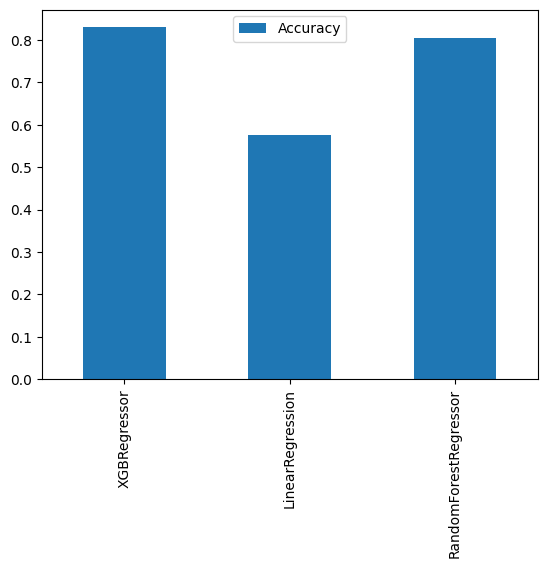

In [52]:
#Plotting 
model_compare.T.plot.bar()

### **Taking XGBRegressor**

In [57]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

In [59]:
print("R squared Error" , r2_score(y_test,y_preds))
print("Mean Squared Error" , mean_squared_error(y_test,y_preds))

R squared Error 0.8301370561019205
Mean Squared Error 0.2225899267544737
